In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('Titanic-Dataset.csv')

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.750,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.000,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.550,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.000,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.shape

(891, 12)

In [72]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
df = df.dropna(subset=['Embarked'])
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [74]:
df.shape

(889, 12)

In [75]:
df['Age'].nunique()

88

In [76]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [77]:
df['Age'] = df.groupby(['Pclass', 'Sex'], group_keys=False)['Age'].transform(
    lambda x: x.fillna(x.rolling(window=11, min_periods=1, center=True).mean())
)
df['Age'] = df['Age'].round(0)

In [78]:
df['Age'].isnull().sum()

np.int64(0)

In [79]:
df['Age'].value_counts()

,count
Age,
30.0,39
28.0,37
22.0,37
21.0,35
24.0,35
...,...
12.0,1
53.0,1
80.0,1


In [80]:
df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
df.shape

(889, 8)

In [81]:
df['Sex'].nunique()

2

In [82]:
df['Sex'].value_counts()


,count
Sex,
male,577
female,312


In [83]:
gender_map={
    'female' : 0,
    'male' : 1
}

df['Gender_no']= df['Sex'].map(gender_map)
df['Gender_no'].value_counts()

,count
Gender_no,
1,577
0,312


In [84]:
min_age=df['Age'].min()
max_age=df['Age'].max()
print(min_age)
print(max_age)

0.0
80.0


In [85]:
bins = list(range(int(min_age - min_age % 10), int(max_age + 10)+1, 10))
labels = [f"{b}-{b+9}" for b in bins[:-1]]

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df['Age_group'].value_counts())


Age_group
20-29    314
30-39    217
10-19    118
40-49    104
0-9       62
50-59     49
60-69     18
70-79      6
80-89      1
Name: count, dtype: int64


In [86]:
df.shape

(889, 10)

In [87]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Gender_no,0
Age_group,0


In [88]:
age_group_mapping = {
    '0-9':1,
    '10-19':2,
    '20-29':3,
    '30-39':4,
    '40-49':5,
    '50-59':6,
    '60-69':7,
    '70-79':8,
    '80-89':9
}
df['Age_group_no'] = df['Age_group'].map(age_group_mapping)
df['Age_group_no'].value_counts()
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Gender_no,0
Age_group,0


In [90]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender_no,Age_group,Age_group_no,Fare_scaled,Family_size,Is_alone,Embarked_no
230,1,1,female,35.0,1,0,83.475,S,1,30-39,4,1.034403,2,0,2
123,1,2,female,32.0,0,0,13.000,S,1,30-39,4,-0.384475,1,1,2
436,0,3,female,21.0,2,2,34.375,S,1,20-29,3,0.045870,5,0,2
213,0,2,male,30.0,0,0,13.000,S,0,30-39,4,-0.384475,1,1,2
63,0,3,male,4.0,3,2,27.900,S,0,0-9,1,-0.084492,6,0,2


In [91]:
df['Family_size'] = df['Parch'] + df['SibSp'] + 1  # +1 includes the passenger themself

# Optional: Create IsAlone feature (binary)
df['Is_alone'] = (df['Family_size'] == 1).astype(int)

In [92]:
print(df['SibSp'].unique())
print(df['Parch'].unique())
print(df[['SibSp', 'Parch']].dtypes)

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
SibSp    int64
Parch    int64
dtype: object


In [93]:
df = df.drop(columns=['Parch', 'SibSp'])

In [94]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Gender_no,Age_group,Age_group_no,Fare_scaled,Family_size,Is_alone,Embarked_no
0,0,3,male,22.0,7.2500,S,0,20-29,3,-0.500240,2,0,2
1,1,1,female,38.0,71.2833,C,1,30-39,4,0.788947,2,0,0
2,1,3,female,26.0,7.9250,S,1,20-29,3,-0.486650,1,1,2
3,1,1,female,35.0,53.1000,S,1,30-39,4,0.422861,2,0,2
4,0,3,male,35.0,8.0500,S,0,30-39,4,-0.484133,1,1,2
5,0,3,male,20.0,8.4583,Q,0,20-29,3,-0.475913,1,1,1
6,0,1,male,54.0,51.8625,S,0,50-59,6,0.397946,1,1,2
7,0,3,male,2.0,21.0750,S,0,0-9,1,-0.221900,5,0,2
8,1,3,female,27.0,11.1333,S,1,20-29,3,-0.422057,3,0,2
9,1,2,female,14.0,30.0708,C,1,10-19,2,-0.040787,2,0,0


In [95]:
embarked_map={
    'C' : 0,
    'Q' : 1,
    'S' : 2
}

df['Embarked_no']= df['Embarked'].map(embarked_map)
df['Embarked_no'].value_counts()

,count
Embarked_no,
2,644
0,168
1,77


In [96]:
df.sample(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,Gender_no,Age_group,Age_group_no,Fare_scaled,Family_size,Is_alone,Embarked_no
855,1,3,female,18.0,9.3500,S,1,10-19,2,-0.457960,2,0,2
766,0,1,male,36.0,39.6000,C,0,30-39,4,0.151065,1,1,0
34,0,1,male,28.0,82.1708,C,0,20-29,3,1.008145,2,0,0
154,0,3,male,32.0,7.3125,S,0,30-39,4,-0.498981,1,1,2


In [97]:
import joblib  # For saving model and scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])  # Fit & transform

# Save the scaler for later use
joblib.dump(scaler, "fare_scaler.pkl")

['fare_scaler.pkl']

In [98]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Gender_no',
       'Age_group', 'Age_group_no', 'Fare_scaled', 'Family_size', 'Is_alone',
       'Embarked_no'],
      dtype='object')

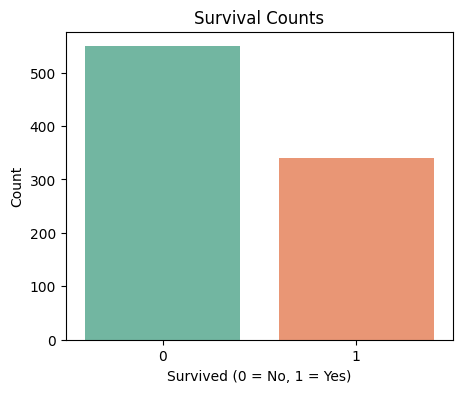

Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64


In [99]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(df['Survived'].value_counts(normalize=True) * 100)

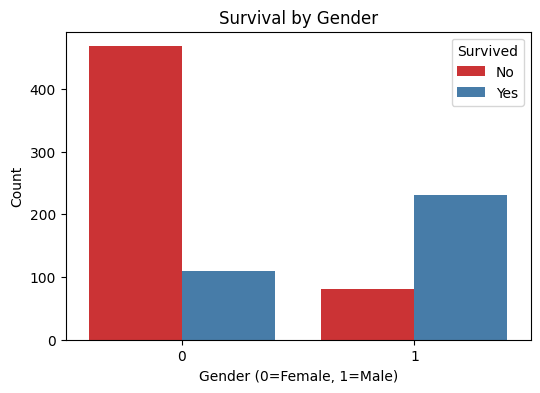

Gender_no
0    18.890815
1    74.038462
Name: Survived, dtype: float64


In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender_no', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

print(df.groupby('Gender_no')['Survived'].mean()*100)

In [101]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

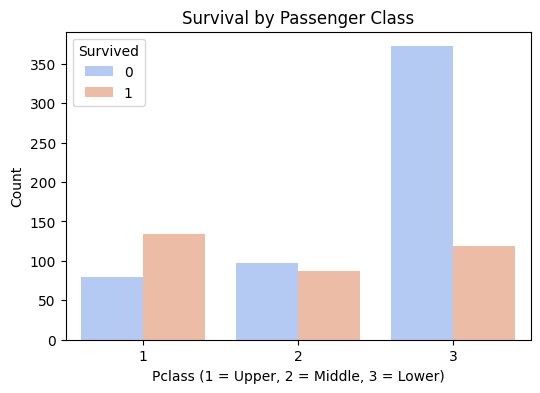

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [102]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Count")
plt.show()

print(df.groupby('Pclass')['Survived'].mean()*100)


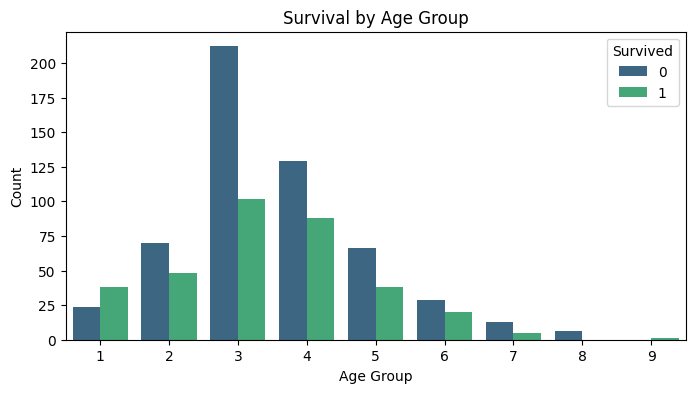

,Survived
Age_group_no,
1,61.290323
2,40.677966
3,32.484076
4,40.552995
5,36.538462
6,40.816327
7,27.777778
8,0.000000
9,100.000000


In [103]:
plt.figure(figsize=(8,4))
sns.countplot(x='Age_group_no', hue='Survived', data=df, palette='viridis')
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

age_survival_rate = df.groupby('Age_group_no')['Survived'].mean()*100
display(age_survival_rate)

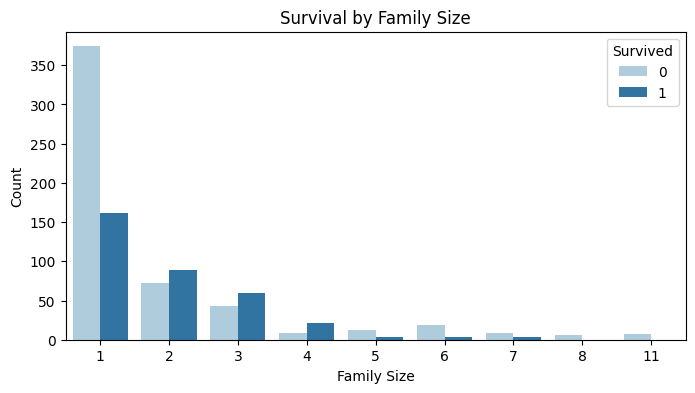

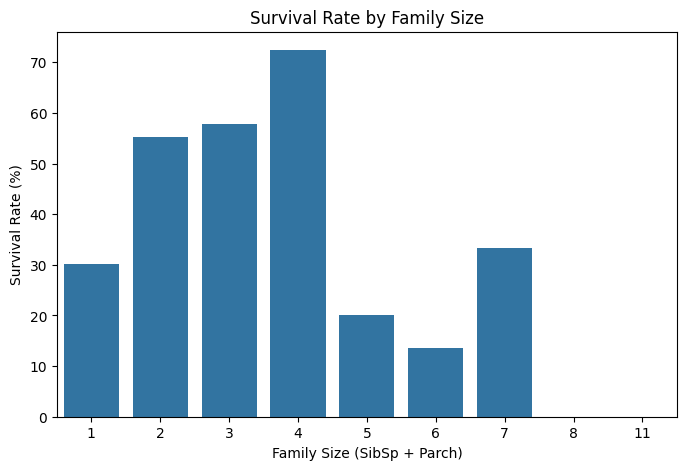

In [104]:
plt.figure(figsize=(8,4))
sns.countplot(x='Family_size', hue='Survived', data=df, palette='Paired')
plt.title("Survival by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()


family_survival = df.groupby('Family_size')['Survived'].mean().reset_index()
family_survival['Survived'] = family_survival['Survived'] *100
plt.figure(figsize=(8,5))
sns.barplot(x='Family_size', y='Survived', data=family_survival)
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Family Size (SibSp + Parch)")
plt.show()

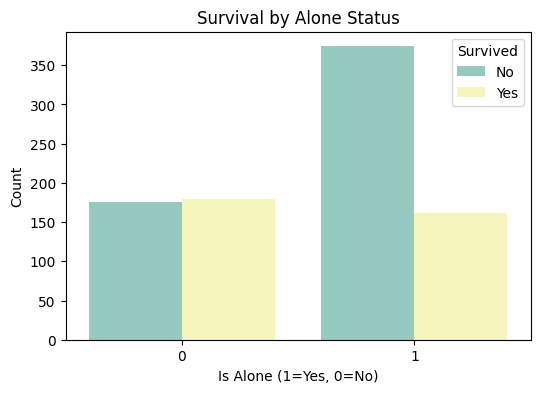

Is_alone
0    50.564972
1    30.093458
Name: Survived, dtype: float64


In [105]:
plt.figure(figsize=(6,4))
sns.countplot(x='Is_alone', hue='Survived', data=df, palette='Set3')
plt.title("Survival by Alone Status")
plt.xlabel("Is Alone (1=Yes, 0=No)")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

print(df.groupby('Is_alone')['Survived'].mean()*100)


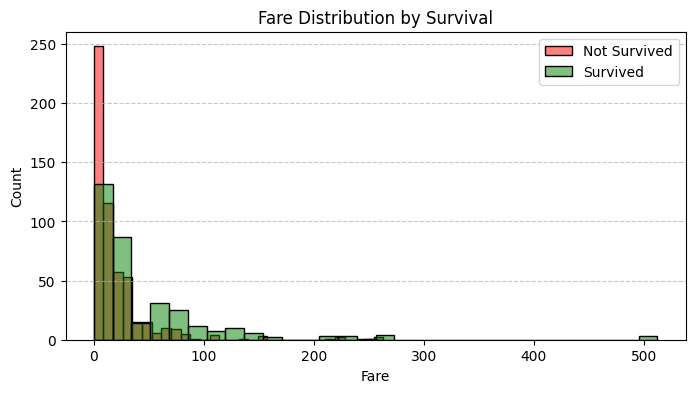

In [107]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Survived']==0]['Fare'], bins=30, color='red', alpha=0.5, label='Not Survived')
sns.histplot(df[df['Survived']==1]['Fare'], bins=30, color='green', alpha=0.5, label='Survived')
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution by Survival")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [108]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Gender_no',
       'Age_group', 'Age_group_no', 'Fare_scaled', 'Family_size', 'Is_alone',
       'Embarked_no'],
      dtype='object')

In [109]:

from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.linear_model import LogisticRegression

# Features & target
X = df[['Pclass', 'Fare_scaled', 'Gender_no', 'Age_group_no', 'Family_size', 'Is_alone', 'Embarked_no']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Save the trained model
joblib.dump(log_reg, "log_reg_model.pkl")

y_pred = log_reg.predict(X_test)

# Evaluate on Test Set
accuracy = log_reg.score(X_test, y_test)
print(f"Model Test Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for log loss
y_pred_proba = log_reg.predict_proba(X_test)  # returns probability for both classes
# Use probability of the positive class (Survived=1)
y_pred_proba_positive = y_pred_proba[:, 1]

# Log Loss (Cross-Entropy Loss)
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.2f}")

Model Test Accuracy: 0.79
Confusion Matrix:
 [[87 22]
 [16 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Log Loss: 0.46


In [110]:
import joblib

loaded_scaler = joblib.load("fare_scaler.pkl")
loaded_model = joblib.load("log_reg_model.pkl")

# Example unseen passenger (raw Fare given)
unseen_data = pd.DataFrame({
    'Pclass': [3],
    'Fare': [80],        # Raw fare (unscaled)
    'Gender_no': [1],
    'Age_group_no': [2],
    'Family_size': [1],
    'Is_alone': [0],
    'Embarked_no': [2]
})

# Scale Fare Column
unseen_data['Fare_scaled'] = loaded_scaler.transform(unseen_data[['Fare']])

# Select only the features used for training
X_unseen = unseen_data[['Pclass', 'Fare_scaled', 'Gender_no', 'Age_group_no', 'Family_size', 'Is_alone', 'Embarked_no']]

# Make Predictions
y_pred = loaded_model.predict(X_unseen)
y_pred_proba = loaded_model.predict_proba(X_unseen)

print(f"Predicted Class: {y_pred[0]}")
print(f"Survival Probability: {y_pred_proba[0][1]:.4f}")

Predicted Class: 1
Survival Probability: 0.8486
